#Package Installation

In [1]:
!pip install matplotlib

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 467 kB/s 
     |████████████████████████████████| 453 kB 63.3 MB/s 


In [3]:
!pip install wordcloud 

# WordCloud Generating

In [4]:
import pandas as pd
import re

from wordcloud import WordCloud, STOPWORDS

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import Counter

import matplotlib.font_manager as fm

fontpath = '/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
fm._rebuild()


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/크롤링데이터/장애인콜택시민원텍스트데이터.csv', index_col=0)

In [7]:
df

,link,content
title,,
77라7854정미양주임님을칭찬합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,오늘은 중화역3번출구에서 면목동집으로귀가할때 정미양주임님이 오래만에배차됐는데 사고예...
누가 무료로 택시 태워달라고 했나요?,https://www.sisul.or.kr/open_content/calltaxi/...,안녕하십니까?장애인의날 무료로 장애인들 택시 탑승시켜준다는 홍보가 아주 역겹습니다....
다시만나게된서울31사6200이관식기사님을칭찬합니다,https://www.sisul.or.kr/open_content/calltaxi/...,오늘중화2동주민센터에서퇴근할때서울31사6200이관식기사님이배차됐는데저를기억해주고 차...
서울32자4582최동원기사님을칭찬합니다. ♡♡♡♡♡,https://www.sisul.or.kr/open_content/calltaxi/...,오늘은최동원기사님을오래만에 배차됐는데 저를기억해주고 저한테잘해주고 승하차시 문개사고...
아이폰용 장애인콜택시 앱 대체 언제 업데이트 하나요?,https://www.sisul.or.kr/open_content/calltaxi/...,아이폰용 장애인콜택시 앱 실행 에러 문제로 작년 11월 29일과 올해 1월 5일 두...
...,...,...
장애인 콜택시 제작자로 등록을 하려고 합니다.,https://www.sisul.or.kr/open_content/calltaxi/...,안녕하세요.저는 아산시에 위치한 새한에어서스펜션 주식회사의 이주환 이사 입니다.상기...
인터넷 접수 장애,https://www.sisul.or.kr/open_content/calltaxi/...,컴에서도 스마트폰에서도 접수 클릭하면 접수확인 창 뜨고 클릭하면 저수완료 대화창이 ...
장애인콜택시 기사님 교육좀 잘 좀 시키세요,https://www.sisul.or.kr/open_content/calltaxi/...,전 매일 아침 장애인콜택시를 이용해서 출근하는 중증의 장애인 입니다.매일아침 장애인...


In [8]:
okt = Okt()

content_list = list(df['content'])
noun_list = []

for sentence in content_list:


    sentence = re.sub('[a-zA-z0-9]','', sentence)
    
    for word, tag in okt.pos(sentence):
        if tag in ['Noun']:  

            if len(word) == 1:
                continue

            else:
                noun_list.append(word)

count = Counter(noun_list)
words = dict(count.most_common(n=50)) 

In [9]:
words

{'감사': 105,
 '경우': 131,
 '고객': 113,
 '기분': 123,
 '기사': 969,
 '다른': 107,
 '다시': 152,
 '답변': 105,
 '대기': 151,
 '도착': 185,
 '때문': 104,
 '마음': 128,
 '문제': 108,
 '민원': 96,
 '바로': 116,
 '배차': 443,
 '병원': 233,
 '사람': 157,
 '상담': 96,
 '상황': 135,
 '생각': 210,
 '서울': 130,
 '시간': 583,
 '신청': 122,
 '아이': 131,
 '안전': 121,
 '오늘': 184,
 '운전': 254,
 '운행': 202,
 '위해': 171,
 '이동': 104,
 '이용': 530,
 '이용자': 122,
 '장애': 131,
 '장애인': 880,
 '장콜': 190,
 '저희': 125,
 '전화': 242,
 '접수': 146,
 '정말': 98,
 '차량': 403,
 '치료': 102,
 '칭찬': 129,
 '콜센터': 105,
 '탑승': 131,
 '택시': 826,
 '하루': 104,
 '항상': 124,
 '확인': 98,
 '휠체어': 243}

In [10]:
words.items()

dict_items([('기사', 969), ('장애인', 880), ('택시', 826), ('시간', 583), ('이용', 530), ('배차', 443), ('차량', 403), ('운전', 254), ('휠체어', 243), ('전화', 242), ('병원', 233), ('생각', 210), ('운행', 202), ('장콜', 190), ('도착', 185), ('오늘', 184), ('위해', 171), ('사람', 157), ('다시', 152), ('대기', 151), ('접수', 146), ('상황', 135), ('장애', 131), ('탑승', 131), ('아이', 131), ('경우', 131), ('서울', 130), ('칭찬', 129), ('마음', 128), ('저희', 125), ('항상', 124), ('기분', 123), ('이용자', 122), ('신청', 122), ('안전', 121), ('바로', 116), ('고객', 113), ('문제', 108), ('다른', 107), ('답변', 105), ('콜센터', 105), ('감사', 105), ('하루', 104), ('때문', 104), ('이동', 104), ('치료', 102), ('정말', 98), ('확인', 98), ('상담', 96), ('민원', 96)])

In [11]:
type(words)

dict

In [12]:
words.pop("장애인")

880

In [13]:
words.pop("택시")

826

In [14]:
words.pop("위해")

171

In [15]:
words.pop("때문")

104

In [16]:
words.pop("정말")

98

In [17]:
words.pop("장콜")

190

In [18]:
words.pop("오늘")

184

In [19]:
words.pop("생각")

210

In [20]:
words.pop("하루")

104

In [21]:
words.pop("저희")

125

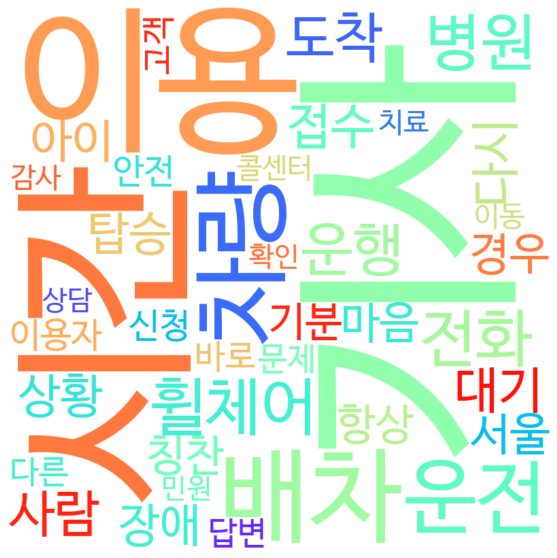

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    font_path = fontpath,
    background_color = 'white',
    colormap = 'rainbow_r', 
    width = 800, 
    height = 800, 
    stopwords = STOPWORDS
).generate_from_frequencies(words)

fig = plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
from PIL import Image, ImageFilter

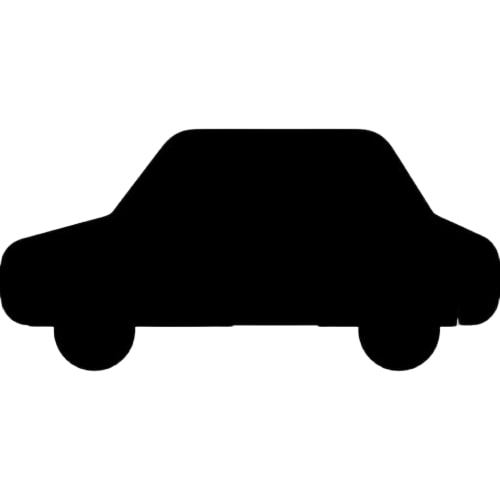

In [24]:
Image.open("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/car2.jpg")

In [25]:
import numpy as np
mask_array = np.array(Image.open("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/car2.jpg"))
mask_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [26]:
df = WordCloud(font_path = fontpath,
                  background_color = "white",
                  collocations = False,
                 mask = mask_array)

df.generate

<bound method WordCloud.generate of <wordcloud.wordcloud.WordCloud object at 0x7f1254535210>>

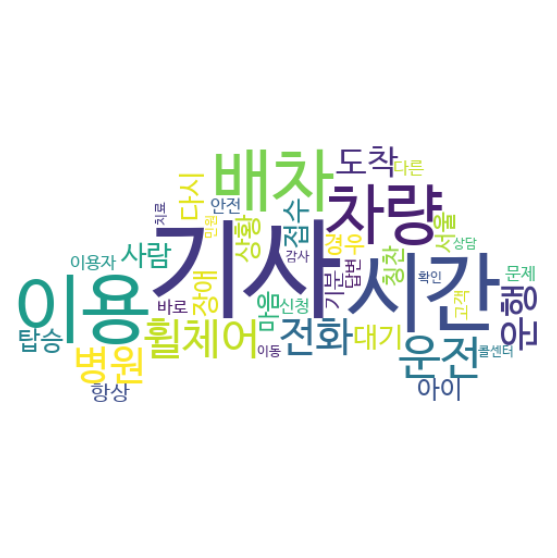

In [27]:
alice_mask = np.array(Image.open("/content/drive/Shareddrives/2022-01_데이터마이닝이론및응용/0_텀프로젝트/car2.jpg"))

wordcloud = WordCloud(font_path = fontpath,
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
)

wordcloud = wordcloud.generate_from_frequencies(words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()